In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [3]:
link = "http://bit.ly/w-data"
df = pd. read_csv(link)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df.shape

(25, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

there are no missing values in the data

#DATA VISUALIZATION

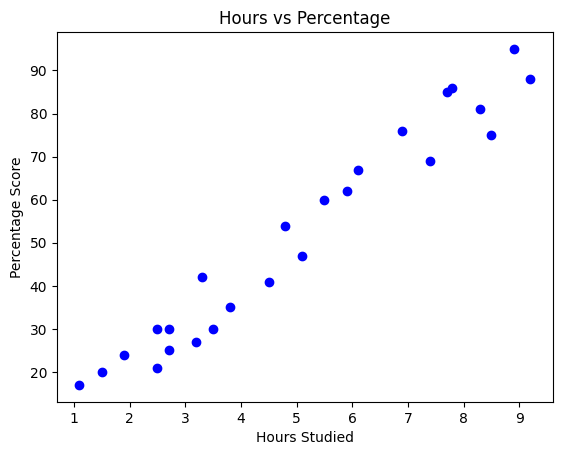

In [8]:
plt.scatter(x=df.Hours,y=df.Scores, color = 'blue')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

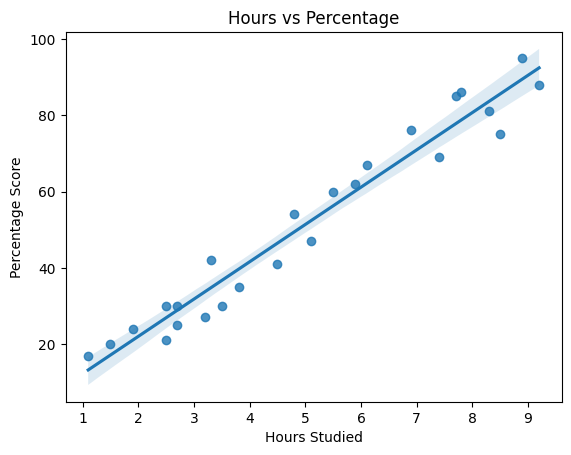

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [9]:
sns.regplot(x=df.Hours, y = df.Scores)
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()
print(df.corr())

number of hours study and score are positively linearly related , so we apply Simple Linear Regression Model 

Splitting into test train

In [10]:
X=df[['Hours']]
y=df[['Scores']]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape,y_test.shape


((20, 1), (5, 1), (20, 1), (5, 1))

Fitting the model

In [12]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [13]:
model.coef_ #for every one unit increase in the 'Hours' studied, the predicted 'Scores' will increase by approximately 9.94 units.

array([[9.68207815]])

In [14]:
model.intercept_ #if 'Hours' is zero, the predicted 'Scores' would be approximately 1.51.

array([2.82689235])

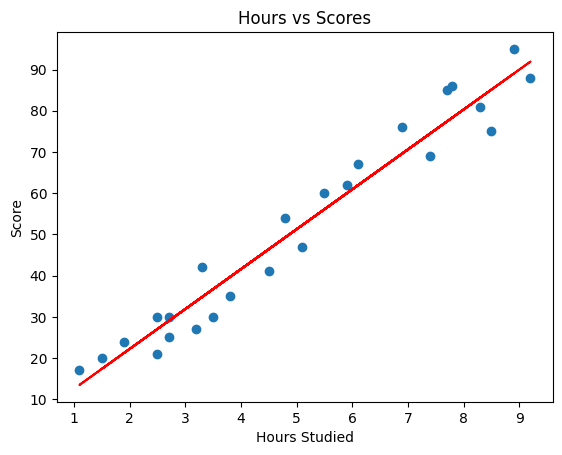

In [15]:
#plot regression line
line = model.coef_*X+model.intercept_

# Plotting for the test data
plt.scatter(X, y,label="Score")
plt.plot(X, line,color="red",label="Regression Line")
plt.title('Hours vs Scores')
plt.xlabel("Hours Studied")
plt.ylabel("Score")
plt.show()

Prediction using fitted model

In [16]:
y_pred = model.predict(X_test)
y_pred

array([[83.18814104],
       [27.03208774],
       [27.03208774],
       [69.63323162],
       [59.95115347]])

In [17]:
y_pred = model.predict(X_test)
prediction = pd.DataFrame({
    'Hours': X_test.values.flatten(),
    'Predicted Marks': y_pred.flatten()
})

print(prediction)

   Hours  Predicted Marks
0    8.3        83.188141
1    2.5        27.032088
2    2.5        27.032088
3    6.9        69.633232
4    5.9        59.951153


In [18]:
compare = pd.DataFrame({'Actual Marks': y_test.squeeze() , 'Predicted Marks': y_pred.squeeze()})
compare

,Actual Marks,Predicted Marks
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


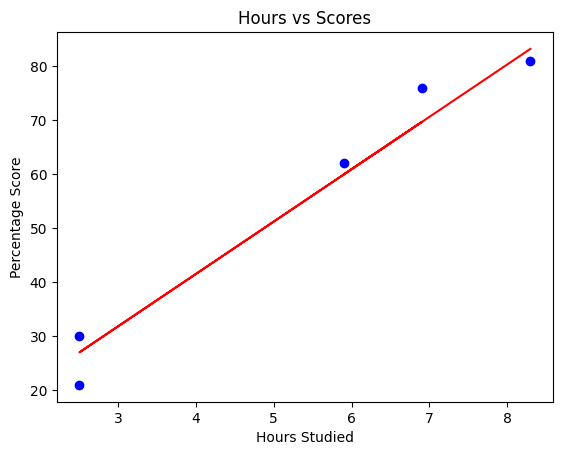

In [19]:
plt.scatter(x=X_test,y=y_test,color ='blue')
plt.plot(X_test,y_pred,color ='red')
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

Model evaluation

In [20]:
print("Mean absolute error : ", metrics.mean_absolute_error(y_test,y_pred))
print("Mean squared error : ", metrics.mean_squared_error(y_test,y_pred))
print("Root Mean squared error : ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Model accuracy in %: ", (r2_score(y_test,y_pred)*100))


Mean absolute error :  3.9207511902099244
Mean squared error :  18.943211722315272
Root Mean squared error :  4.352380006653288
Model accuracy in %:  96.78055545167994


In [21]:
import joblib
joblib.dump(model, 'model.pkl')


['model.pkl']

Prediction of real time values

In [22]:
hours = 9.25
pred = model.predict([[hours]])
print("If a person studies for {} hours, he may score {} marks ".format(hours,pred[0][0]))

import warnings
warnings.filterwarnings('ignore')

If a person studies for 9.25 hours, he may score 92.38611528261494 marks 


f:\Python 3.10\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
